In [1]:
import numpy as np
from matplotlib.pyplot import plot, scatter, legend, show

In [2]:
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

In [3]:
class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds

        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            self.centers, _ = kmeans(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)

        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b

                loss = (y[i] - F).flatten() ** 2
                
                print('epoch: ',epoch+1, ' sample #: ', i+1, ', Loss: {0:.4f}'.format(loss[0]))

                # backward pass
                error = -(y[i] - F).flatten()

                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

In [4]:
def kmeans(X, k):
    """Performs k-means clustering for 1D input
    
    Arguments:
        X {ndarray} -- A Mx1 array of inputs
        k {int} -- Number of clusters
    
    Returns:
        ndarray -- A kx1 array of final cluster centers
    """

    # randomly select initial clusters from input data
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False

    while not converged:
        """
        compute distances for each cluster center to each point 
        where (distances[i, j] represents the distance between the ith point and jth cluster)
        """
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))

        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)

        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)

        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()

    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)

    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])

    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))

    return clusters, stds

In [5]:
# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)

noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * (X))  + noise

rbfnet = RBFNet(lr=1e-2, k=2, epochs = 50, inferStds=True)
rbfnet.fit(X, y)

y_pred = rbfnet.predict(X)


epoch:  1  sample #:  1 , Loss: 1.4434
epoch:  1  sample #:  2 , Loss: 1.2216
epoch:  1  sample #:  3 , Loss: 1.2979
epoch:  1  sample #:  4 , Loss: 1.7682
epoch:  1  sample #:  5 , Loss: 1.5175
epoch:  1  sample #:  6 , Loss: 1.5354
epoch:  1  sample #:  7 , Loss: 1.7401
epoch:  1  sample #:  8 , Loss: 1.9155
epoch:  1  sample #:  9 , Loss: 2.0372
epoch:  1  sample #:  10 , Loss: 2.3013
epoch:  1  sample #:  11 , Loss: 2.0648
epoch:  1  sample #:  12 , Loss: 2.7062
epoch:  1  sample #:  13 , Loss: 2.3241
epoch:  1  sample #:  14 , Loss: 2.5313
epoch:  1  sample #:  15 , Loss: 2.2875
epoch:  1  sample #:  16 , Loss: 2.4422
epoch:  1  sample #:  17 , Loss: 2.6792
epoch:  1  sample #:  18 , Loss: 2.5103
epoch:  1  sample #:  19 , Loss: 2.2636
epoch:  1  sample #:  20 , Loss: 2.6777
epoch:  1  sample #:  21 , Loss: 2.5776
epoch:  1  sample #:  22 , Loss: 2.5996
epoch:  1  sample #:  23 , Loss: 2.3524
epoch:  1  sample #:  24 , Loss: 2.4214
epoch:  1  sample #:  25 , Loss: 2.0764
epoch:  1

epoch:  4  sample #:  74 , Loss: 0.0043
epoch:  4  sample #:  75 , Loss: 0.0001
epoch:  4  sample #:  76 , Loss: 0.0042
epoch:  4  sample #:  77 , Loss: 0.0117
epoch:  4  sample #:  78 , Loss: 0.0000
epoch:  4  sample #:  79 , Loss: 0.0004
epoch:  4  sample #:  80 , Loss: 0.0006
epoch:  4  sample #:  81 , Loss: 0.0000
epoch:  4  sample #:  82 , Loss: 0.0001
epoch:  4  sample #:  83 , Loss: 0.0025
epoch:  4  sample #:  84 , Loss: 0.0008
epoch:  4  sample #:  85 , Loss: 0.0033
epoch:  4  sample #:  86 , Loss: 0.0001
epoch:  4  sample #:  87 , Loss: 0.0012
epoch:  4  sample #:  88 , Loss: 0.0057
epoch:  4  sample #:  89 , Loss: 0.0168
epoch:  4  sample #:  90 , Loss: 0.0037
epoch:  4  sample #:  91 , Loss: 0.0053
epoch:  4  sample #:  92 , Loss: 0.0001
epoch:  4  sample #:  93 , Loss: 0.0139
epoch:  4  sample #:  94 , Loss: 0.0006
epoch:  4  sample #:  95 , Loss: 0.0030
epoch:  4  sample #:  96 , Loss: 0.0075
epoch:  4  sample #:  97 , Loss: 0.0012
epoch:  4  sample #:  98 , Loss: 0.0095


epoch:  8  sample #:  41 , Loss: 0.0272
epoch:  8  sample #:  42 , Loss: 0.0860
epoch:  8  sample #:  43 , Loss: 0.0377
epoch:  8  sample #:  44 , Loss: 0.0679
epoch:  8  sample #:  45 , Loss: 0.0838
epoch:  8  sample #:  46 , Loss: 0.0361
epoch:  8  sample #:  47 , Loss: 0.0172
epoch:  8  sample #:  48 , Loss: 0.0353
epoch:  8  sample #:  49 , Loss: 0.0417
epoch:  8  sample #:  50 , Loss: 0.0263
epoch:  8  sample #:  51 , Loss: 0.0247
epoch:  8  sample #:  52 , Loss: 0.0002
epoch:  8  sample #:  53 , Loss: 0.0368
epoch:  8  sample #:  54 , Loss: 0.0007
epoch:  8  sample #:  55 , Loss: 0.0431
epoch:  8  sample #:  56 , Loss: 0.0119
epoch:  8  sample #:  57 , Loss: 0.0342
epoch:  8  sample #:  58 , Loss: 0.0302
epoch:  8  sample #:  59 , Loss: 0.0085
epoch:  8  sample #:  60 , Loss: 0.0205
epoch:  8  sample #:  61 , Loss: 0.0546
epoch:  8  sample #:  62 , Loss: 0.0173
epoch:  8  sample #:  63 , Loss: 0.0428
epoch:  8  sample #:  64 , Loss: 0.0408
epoch:  8  sample #:  65 , Loss: 0.0078


epoch:  12  sample #:  34 , Loss: 0.0291
epoch:  12  sample #:  35 , Loss: 0.0007
epoch:  12  sample #:  36 , Loss: 0.0299
epoch:  12  sample #:  37 , Loss: 0.0139
epoch:  12  sample #:  38 , Loss: 0.0435
epoch:  12  sample #:  39 , Loss: 0.0288
epoch:  12  sample #:  40 , Loss: 0.0428
epoch:  12  sample #:  41 , Loss: 0.0232
epoch:  12  sample #:  42 , Loss: 0.0813
epoch:  12  sample #:  43 , Loss: 0.0356
epoch:  12  sample #:  44 , Loss: 0.0654
epoch:  12  sample #:  45 , Loss: 0.0811
epoch:  12  sample #:  46 , Loss: 0.0348
epoch:  12  sample #:  47 , Loss: 0.0168
epoch:  12  sample #:  48 , Loss: 0.0376
epoch:  12  sample #:  49 , Loss: 0.0452
epoch:  12  sample #:  50 , Loss: 0.0292
epoch:  12  sample #:  51 , Loss: 0.0281
epoch:  12  sample #:  52 , Loss: 0.0010
epoch:  12  sample #:  53 , Loss: 0.0305
epoch:  12  sample #:  54 , Loss: 0.0001
epoch:  12  sample #:  55 , Loss: 0.0358
epoch:  12  sample #:  56 , Loss: 0.0080
epoch:  12  sample #:  57 , Loss: 0.0268
epoch:  12  samp

epoch:  16  sample #:  15 , Loss: 0.0159
epoch:  16  sample #:  16 , Loss: 0.0047
epoch:  16  sample #:  17 , Loss: 0.0001
epoch:  16  sample #:  18 , Loss: 0.0036
epoch:  16  sample #:  19 , Loss: 0.0133
epoch:  16  sample #:  20 , Loss: 0.0010
epoch:  16  sample #:  21 , Loss: 0.0008
epoch:  16  sample #:  22 , Loss: 0.0019
epoch:  16  sample #:  23 , Loss: 0.0000
epoch:  16  sample #:  24 , Loss: 0.0011
epoch:  16  sample #:  25 , Loss: 0.0036
epoch:  16  sample #:  26 , Loss: 0.0061
epoch:  16  sample #:  27 , Loss: 0.0004
epoch:  16  sample #:  28 , Loss: 0.0002
epoch:  16  sample #:  29 , Loss: 0.0073
epoch:  16  sample #:  30 , Loss: 0.0058
epoch:  16  sample #:  31 , Loss: 0.0035
epoch:  16  sample #:  32 , Loss: 0.0031
epoch:  16  sample #:  33 , Loss: 0.0001
epoch:  16  sample #:  34 , Loss: 0.0257
epoch:  16  sample #:  35 , Loss: 0.0003
epoch:  16  sample #:  36 , Loss: 0.0269
epoch:  16  sample #:  37 , Loss: 0.0120
epoch:  16  sample #:  38 , Loss: 0.0408
epoch:  16  samp

epoch:  19  sample #:  85 , Loss: 0.0001
epoch:  19  sample #:  86 , Loss: 0.0027
epoch:  19  sample #:  87 , Loss: 0.0086
epoch:  19  sample #:  88 , Loss: 0.0003
epoch:  19  sample #:  89 , Loss: 0.0058
epoch:  19  sample #:  90 , Loss: 0.0001
epoch:  19  sample #:  91 , Loss: 0.0005
epoch:  19  sample #:  92 , Loss: 0.0004
epoch:  19  sample #:  93 , Loss: 0.0211
epoch:  19  sample #:  94 , Loss: 0.0025
epoch:  19  sample #:  95 , Loss: 0.0063
epoch:  19  sample #:  96 , Loss: 0.0121
epoch:  19  sample #:  97 , Loss: 0.0031
epoch:  19  sample #:  98 , Loss: 0.0141
epoch:  19  sample #:  99 , Loss: 0.0010
epoch:  19  sample #:  100 , Loss: 0.0002
epoch:  20  sample #:  1 , Loss: 0.0647
epoch:  20  sample #:  2 , Loss: 0.1195
epoch:  20  sample #:  3 , Loss: 0.1216
epoch:  20  sample #:  4 , Loss: 0.0296
epoch:  20  sample #:  5 , Loss: 0.0761
epoch:  20  sample #:  6 , Loss: 0.0670
epoch:  20  sample #:  7 , Loss: 0.0459
epoch:  20  sample #:  8 , Loss: 0.0400
epoch:  20  sample #:  

epoch:  23  sample #:  71 , Loss: 0.0001
epoch:  23  sample #:  72 , Loss: 0.0024
epoch:  23  sample #:  73 , Loss: 0.0058
epoch:  23  sample #:  74 , Loss: 0.0012
epoch:  23  sample #:  75 , Loss: 0.0123
epoch:  23  sample #:  76 , Loss: 0.0011
epoch:  23  sample #:  77 , Loss: 0.0002
epoch:  23  sample #:  78 , Loss: 0.0094
epoch:  23  sample #:  79 , Loss: 0.0122
epoch:  23  sample #:  80 , Loss: 0.0129
epoch:  23  sample #:  81 , Loss: 0.0071
epoch:  23  sample #:  82 , Loss: 0.0051
epoch:  23  sample #:  83 , Loss: 0.0166
epoch:  23  sample #:  84 , Loss: 0.0108
epoch:  23  sample #:  85 , Loss: 0.0001
epoch:  23  sample #:  86 , Loss: 0.0028
epoch:  23  sample #:  87 , Loss: 0.0088
epoch:  23  sample #:  88 , Loss: 0.0003
epoch:  23  sample #:  89 , Loss: 0.0056
epoch:  23  sample #:  90 , Loss: 0.0001
epoch:  23  sample #:  91 , Loss: 0.0005
epoch:  23  sample #:  92 , Loss: 0.0005
epoch:  23  sample #:  93 , Loss: 0.0218
epoch:  23  sample #:  94 , Loss: 0.0028
epoch:  23  samp

epoch:  27  sample #:  78 , Loss: 0.0092
epoch:  27  sample #:  79 , Loss: 0.0120
epoch:  27  sample #:  80 , Loss: 0.0127
epoch:  27  sample #:  81 , Loss: 0.0070
epoch:  27  sample #:  82 , Loss: 0.0050
epoch:  27  sample #:  83 , Loss: 0.0165
epoch:  27  sample #:  84 , Loss: 0.0107
epoch:  27  sample #:  85 , Loss: 0.0001
epoch:  27  sample #:  86 , Loss: 0.0028
epoch:  27  sample #:  87 , Loss: 0.0089
epoch:  27  sample #:  88 , Loss: 0.0003
epoch:  27  sample #:  89 , Loss: 0.0056
epoch:  27  sample #:  90 , Loss: 0.0000
epoch:  27  sample #:  91 , Loss: 0.0004
epoch:  27  sample #:  92 , Loss: 0.0006
epoch:  27  sample #:  93 , Loss: 0.0224
epoch:  27  sample #:  94 , Loss: 0.0030
epoch:  27  sample #:  95 , Loss: 0.0070
epoch:  27  sample #:  96 , Loss: 0.0131
epoch:  27  sample #:  97 , Loss: 0.0037
epoch:  27  sample #:  98 , Loss: 0.0153
epoch:  27  sample #:  99 , Loss: 0.0013
epoch:  27  sample #:  100 , Loss: 0.0003
epoch:  28  sample #:  1 , Loss: 0.0627
epoch:  28  samp

epoch:  31  sample #:  80 , Loss: 0.0124
epoch:  31  sample #:  81 , Loss: 0.0068
epoch:  31  sample #:  82 , Loss: 0.0048
epoch:  31  sample #:  83 , Loss: 0.0162
epoch:  31  sample #:  84 , Loss: 0.0105
epoch:  31  sample #:  85 , Loss: 0.0001
epoch:  31  sample #:  86 , Loss: 0.0028
epoch:  31  sample #:  87 , Loss: 0.0089
epoch:  31  sample #:  88 , Loss: 0.0003
epoch:  31  sample #:  89 , Loss: 0.0055
epoch:  31  sample #:  90 , Loss: 0.0000
epoch:  31  sample #:  91 , Loss: 0.0004
epoch:  31  sample #:  92 , Loss: 0.0007
epoch:  31  sample #:  93 , Loss: 0.0230
epoch:  31  sample #:  94 , Loss: 0.0032
epoch:  31  sample #:  95 , Loss: 0.0073
epoch:  31  sample #:  96 , Loss: 0.0136
epoch:  31  sample #:  97 , Loss: 0.0039
epoch:  31  sample #:  98 , Loss: 0.0158
epoch:  31  sample #:  99 , Loss: 0.0014
epoch:  31  sample #:  100 , Loss: 0.0004
epoch:  32  sample #:  1 , Loss: 0.0617
epoch:  32  sample #:  2 , Loss: 0.1156
epoch:  32  sample #:  3 , Loss: 0.1183
epoch:  32  sample

epoch:  35  sample #:  92 , Loss: 0.0008
epoch:  35  sample #:  93 , Loss: 0.0234
epoch:  35  sample #:  94 , Loss: 0.0034
epoch:  35  sample #:  95 , Loss: 0.0076
epoch:  35  sample #:  96 , Loss: 0.0140
epoch:  35  sample #:  97 , Loss: 0.0041
epoch:  35  sample #:  98 , Loss: 0.0162
epoch:  35  sample #:  99 , Loss: 0.0015
epoch:  35  sample #:  100 , Loss: 0.0004
epoch:  36  sample #:  1 , Loss: 0.0607
epoch:  36  sample #:  2 , Loss: 0.1144
epoch:  36  sample #:  3 , Loss: 0.1173
epoch:  36  sample #:  4 , Loss: 0.0278
epoch:  36  sample #:  5 , Loss: 0.0735
epoch:  36  sample #:  6 , Loss: 0.0646
epoch:  36  sample #:  7 , Loss: 0.0445
epoch:  36  sample #:  8 , Loss: 0.0395
epoch:  36  sample #:  9 , Loss: 0.0400
epoch:  36  sample #:  10 , Loss: 0.0137
epoch:  36  sample #:  11 , Loss: 0.0349
epoch:  36  sample #:  12 , Loss: 0.0007
epoch:  36  sample #:  13 , Loss: 0.0237
epoch:  36  sample #:  14 , Loss: 0.0046
epoch:  36  sample #:  15 , Loss: 0.0183
epoch:  36  sample #:  1

epoch:  39  sample #:  42 , Loss: 0.0823
epoch:  39  sample #:  43 , Loss: 0.0376
epoch:  39  sample #:  44 , Loss: 0.0683
epoch:  39  sample #:  45 , Loss: 0.0844
epoch:  39  sample #:  46 , Loss: 0.0375
epoch:  39  sample #:  47 , Loss: 0.0192
epoch:  39  sample #:  48 , Loss: 0.0448
epoch:  39  sample #:  49 , Loss: 0.0541
epoch:  39  sample #:  50 , Loss: 0.0364
epoch:  39  sample #:  51 , Loss: 0.0356
epoch:  39  sample #:  52 , Loss: 0.0029
epoch:  39  sample #:  53 , Loss: 0.0234
epoch:  39  sample #:  54 , Loss: 0.0001
epoch:  39  sample #:  55 , Loss: 0.0284
epoch:  39  sample #:  56 , Loss: 0.0049
epoch:  39  sample #:  57 , Loss: 0.0212
epoch:  39  sample #:  58 , Loss: 0.0181
epoch:  39  sample #:  59 , Loss: 0.0028
epoch:  39  sample #:  60 , Loss: 0.0109
epoch:  39  sample #:  61 , Loss: 0.0382
epoch:  39  sample #:  62 , Loss: 0.0088
epoch:  39  sample #:  63 , Loss: 0.0288
epoch:  39  sample #:  64 , Loss: 0.0272
epoch:  39  sample #:  65 , Loss: 0.0027
epoch:  39  samp

epoch:  43  sample #:  48 , Loss: 0.0455
epoch:  43  sample #:  49 , Loss: 0.0549
epoch:  43  sample #:  50 , Loss: 0.0370
epoch:  43  sample #:  51 , Loss: 0.0362
epoch:  43  sample #:  52 , Loss: 0.0031
epoch:  43  sample #:  53 , Loss: 0.0230
epoch:  43  sample #:  54 , Loss: 0.0002
epoch:  43  sample #:  55 , Loss: 0.0280
epoch:  43  sample #:  56 , Loss: 0.0047
epoch:  43  sample #:  57 , Loss: 0.0210
epoch:  43  sample #:  58 , Loss: 0.0180
epoch:  43  sample #:  59 , Loss: 0.0028
epoch:  43  sample #:  60 , Loss: 0.0109
epoch:  43  sample #:  61 , Loss: 0.0381
epoch:  43  sample #:  62 , Loss: 0.0088
epoch:  43  sample #:  63 , Loss: 0.0287
epoch:  43  sample #:  64 , Loss: 0.0273
epoch:  43  sample #:  65 , Loss: 0.0027
epoch:  43  sample #:  66 , Loss: 0.0092
epoch:  43  sample #:  67 , Loss: 0.0000
epoch:  43  sample #:  68 , Loss: 0.0039
epoch:  43  sample #:  69 , Loss: 0.0103
epoch:  43  sample #:  70 , Loss: 0.0000
epoch:  43  sample #:  71 , Loss: 0.0000
epoch:  43  samp

epoch:  47  sample #:  50 , Loss: 0.0376
epoch:  47  sample #:  51 , Loss: 0.0368
epoch:  47  sample #:  52 , Loss: 0.0032
epoch:  47  sample #:  53 , Loss: 0.0226
epoch:  47  sample #:  54 , Loss: 0.0002
epoch:  47  sample #:  55 , Loss: 0.0277
epoch:  47  sample #:  56 , Loss: 0.0046
epoch:  47  sample #:  57 , Loss: 0.0208
epoch:  47  sample #:  58 , Loss: 0.0178
epoch:  47  sample #:  59 , Loss: 0.0027
epoch:  47  sample #:  60 , Loss: 0.0108
epoch:  47  sample #:  61 , Loss: 0.0380
epoch:  47  sample #:  62 , Loss: 0.0087
epoch:  47  sample #:  63 , Loss: 0.0287
epoch:  47  sample #:  64 , Loss: 0.0274
epoch:  47  sample #:  65 , Loss: 0.0028
epoch:  47  sample #:  66 , Loss: 0.0093
epoch:  47  sample #:  67 , Loss: 0.0000
epoch:  47  sample #:  68 , Loss: 0.0040
epoch:  47  sample #:  69 , Loss: 0.0104
epoch:  47  sample #:  70 , Loss: 0.0000
epoch:  47  sample #:  71 , Loss: 0.0000
epoch:  47  sample #:  72 , Loss: 0.0030
epoch:  47  sample #:  73 , Loss: 0.0068
epoch:  47  samp

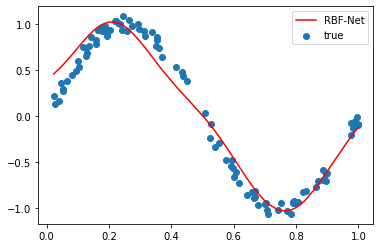

In [6]:
scatter(X, y, label='true')
plot(X, y_pred, '-r', label='RBF-Net')
legend()
show()